Importing All the Required Library

In [127]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

First Importing the Future data from excel sheet. Then Removing all the unwanted Coulmns like 'Aj_Oi' from the dataframe.
Converted the 1 min data to 15 minutes because it would take hours to backtest 1 min data for 1 year.
Using groupby function , converted intraday data seperately to 15 min and then merged all of them.

In [128]:
df = pd.read_csv("BANKNIFTY_2017_FUT.csv")
df = df[df['Contract'] == 'I']
df.drop( columns = { 'OI' , 'Volume', 'Adj_Open' , 'Adj_High' , 'Adj_Low' , 'Adj_Close' , 'Adj_OI' , 'Adj_Volume' , 'Ticker' } , inplace = True)
df.set_index(df.index , inplace = True)
list = np.arange(0 , len(df))
ind = pd.Index(list)
df = df.set_index(ind)
intra = df.groupby('Date')
j = []
for intr_day in intra :
    timer = 1
    intr_day = intr_day[1]
    df_5 = [ intr_day.iloc[0: 1] ]
    for i in range (1 , len(intr_day)) :
        if timer != 16 :
            timer = timer + 1
        if timer == 16 :
            df_5.append(intr_day.iloc[i:i+1])
            timer = 1
    
    df_5_min = pd.DataFrame()
    for i in range (len(df_5)) :
        df_5_min = pd.concat(  [df_5_min , df_5[i] ] , axis = 0   )
    j.append(df_5_min) 
    
    
    

t =pd.concat( j , ignore_index = True)
df = t
df
 

,Date,Time,Open,High,Low,Close,Contract,Expiry
0,2017-01-02,09:15:59,18210.05,18261.20,18210.00,18213.85,I,2017-01-25
1,2017-01-02,09:30:59,18108.85,18108.85,18085.00,18085.65,I,2017-01-25
2,2017-01-02,09:45:59,18083.35,18085.50,18067.60,18067.60,I,2017-01-25
3,2017-01-02,10:00:59,18056.00,18065.00,18051.30,18060.10,I,2017-01-25
4,2017-01-02,10:15:59,18060.20,18065.40,18060.20,18063.00,I,2017-01-25
...,...,...,...,...,...,...,...,...
6356,2017-12-29,14:15:59,25553.95,25557.50,25553.50,25553.50,I,2018-01-25
6357,2017-12-29,14:30:59,25548.85,25552.65,25548.85,25552.55,I,2018-01-25
6358,2017-12-29,14:45:59,25555.00,25556.95,25552.70,25552.70,I,2018-01-25
6359,2017-12-29,15:00:59,25538.50,25546.95,25534.50,25546.95,I,2018-01-25


Imported the options data from excel to a dataframe dff. We only required weekly expiry contract so we deleted all the other
contracts. Also Delted unwanted columns like 'Adj_Low' etc .

In [129]:
dff = pd.read_csv("BANKNIFTY_2017_OPT.csv")
dff = dff[ (  (dff['Contract_Monthly'] == 'W') | (dff['Contract_Monthly'] == 'I') )  &  (dff['Contract_Weekly'] == 'I') ]
dff.drop( columns = { 'OI' , 'Volume', 'Adj_Open' , 'Adj_High' , 'Adj_Low' , 'Adj_Close' , 'Adj_OI' , 'Adj_Volume' , 'Ticker' } , inplace = True)
dff['Strike'] = dff['Strike'].astype(float).astype(int)
#dff[ (dff['Contract_Monthly'] == 'I')  &  (dff['Contract_Weekly'] == 'I') ].iloc[200000]
dff

,Date,Time,Open,High,Low,Close,Type,Contract_Monthly,Contract_Weekly,Strike,Expiry,Adj_Strike
1,2017-01-02,09:15:59,7.00,12.00,5.75,5.80,CE,W,I,18900,2017-01-05,18900.0
2,2017-01-02,09:15:59,4.40,6.60,4.15,4.20,CE,W,I,19000,2017-01-05,19000.0
3,2017-01-02,09:15:59,3.00,3.00,3.00,3.00,CE,W,I,19100,2017-01-05,19100.0
4,2017-01-02,09:15:59,1.50,1.50,1.50,1.50,CE,W,I,19500,2017-01-05,19500.0
24,2017-01-02,09:15:59,11.35,13.90,8.75,9.20,CE,W,I,18800,2017-01-05,18800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5283591,2017-12-29,15:29:59,163.25,164.45,154.10,154.10,PE,W,I,25600,2018-01-04,25600.0
5283592,2017-12-29,15:29:59,95.20,99.00,93.35,93.35,CE,W,I,25600,2018-01-04,25600.0
5283593,2017-12-29,15:29:59,472.05,472.05,462.00,462.00,PE,W,I,26000,2018-01-04,26000.0
5283595,2017-12-29,15:30:59,99.00,99.00,99.00,99.00,CE,W,I,25600,2018-01-04,25600.0


Here the main Backtetsting Occurs . Initialized all the varibales like capital,trade etc and created a cols array with all the information required in the TradeReport. Looped over the future data and found the premium collected when the entry condition is met. After it all the premium is updated as market data moves forward. stop loss and take profit is kept at entry and strikes are choosen atm_strike of price. Options data are collected from the options excel sheet for particular date , time, strike.

As the trade ends either beacuse of expiration or sl or tp level , TradeReport is updated and filled with all information.
Option selling margin for atm legs are calculated based on span , exposure margin and hedge otm legs by their premium.

If any data cannot be found in options excel sheet provided , then we try any strike price close to it or any data close to that tick data.

In [6]:
import math
trade = 0
pl = 0
strike_multiple = 100
cols = ['Date' , 'Expiry' , 'En_Date' , 'Ce_En_Date' , 'Pe_En_Date' , 'Ce_Ex_Date' , 'Pe_Ex_Date' , 'Fut_En_Price' , 'Atm_Strike' , 'Ce_Short_Strike' , 'Pe_Short_Strike' , 'Ce_Long_Strike' , 'PE_Long_Strike' , 'Ce_Short_En_Price' , 'Ce_Short_Ex_Price' , 'Pe_Short_En_Price' , 'Pe_Short_Ex_Price' , 'Ce_Long_En_Price' , 'Ce_Long_Ex_Price' , 'Pe_Long_En_Price' , 'Pe_Long_Ex_price' , 'Returns_Abs' , 'Quantity' , 'Lot_Size' , 'Total_Abs' ,'Total_Capital_Returns'   ]
capital = 1000000
trade_report = []
sl = 0
tp = 0
Current_Total_Premium = 0
for i in range (3406 ,len(df)) :
    if (trade == 0) & (df['Time'].iloc[i] == '10:30:59') :
        atm_strike = strike_multiple * round(df['Close'].iloc[i] / strike_multiple)
        hedge_strike_ce = strike_multiple*round( ( atm_strike + (atm_strike*0.02) ) / strike_multiple )
        hedge_strike_pe = strike_multiple*round( ( atm_strike - (atm_strike*0.02) ) / strike_multiple )
        #print(df['Date'].iloc[i])
        #print(df['Time'].iloc[i])
        #print(hedge_strike_ce)
        ml = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == atm_strike )  ]
        hl1 = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == hedge_strike_ce) & (dff['Type'] == 'CE')  ]
        si = 100
        while np.shape(hl1)[0] == 0 :
            hl1 = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == (hedge_strike_ce - si) ) & (dff['Type'] == 'CE')   ]
            si = si + 100
        hl2 = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == hedge_strike_pe ) & (dff['Type'] == 'PE') ]
        ssii = 100
        while np.shape(hl2)[0] == 0 :
            hl2 = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == (hedge_strike_pe -ssii) ) & (dff['Type'] == 'PE') ]
            ssii = ssii + 100    
        
        Total_premium = ml['Close'].iloc[0] + ml['Close'].iloc[1] - hl1['Close'].iloc[0] - hl2['Close'].iloc[0]
        print(Total_premium)
        #print(hl1['Close'].iloc[0])
        sl = Total_premium +Total_premium*0.3
        tp = Total_premium - Total_premium*0.8
        Date = df['Date'].iloc[i]
        Expiry = ml['Expiry'].iloc[0]
        En_Date = df['Date'].iloc[i]
        Ce_En_Date = df['Date'].iloc[i]
        Pe_En_Date = df['Date'].iloc[i]
        Fut_En_Price = df['Close'].iloc[i]
        Atm_Strike = ml['Strike'].iloc[0]
        Ce_Short_Strike = ml['Strike'].iloc[0]
        Pe_Short_Strike = ml['Strike'].iloc[0]
        Ce_Long_Strike = hl1['Strike'].iloc[0]
        Pe_Long_Strike = hl2['Strike'].iloc[0]
        Ce_Short_En_Price = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == atm_strike ) & (dff['Type'] == 'CE') ]['Close'].iloc[0]
        Pe_Short_En_Price = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == atm_strike ) & (dff['Type'] == 'PE') ]['Close'].iloc[0]
        Ce_Long_En_Price = hl1['Close'].iloc[0]
        Pe_Long_En_Price = hl2['Close'].iloc[0]
        notional_value = Atm_Strike * 25
        Span_Margin = notional_value * 0.01
        Exposure_Margin = notional_value*0.06
        one_leg_margin = Span_Margin + Exposure_Margin
        one_leg_margin_hedge = one_leg_margin*0.03
        Straddle_Margin = 2*one_leg_margin_hedge
        hedge1 = 25*Ce_Long_En_Price
        hedge2 = 25*Pe_Long_En_Price
        hedge_leg = hedge1 + hedge2
        Quantity = math.floor(capital/ ( Straddle_Margin + hedge_leg) )
        qq = Quantity/ 25
        Quantity = math.floor(qq)*25
        trade = 1
        print(sl)
        print(tp)
        
    if trade == 1:
        f =dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == atm_strike ) ]
        g = 1
        while (np.shape(f)[0] != 2) :
            f =dff[  (dff['Date'] == df['Date'].iloc[i-g]) & (dff['Time'] == df['Time'].iloc[i-g]) &  (dff['Strike'] == atm_strike ) ]
            g = g + 1
        ff = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == hl1['Strike'].iloc[0] ) & (dff['Type'] == 'CE')  ]
        sii = 100
        sii_ = 0
        while np.shape(ff)[0] ==  0 :
            ff = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == ( hl1['Strike'].iloc[0] - sii)  ) & (dff['Type'] == 'CE')  ]
            sii = sii + 100
            sii_ = sii_ + 1
            if sii_ == 30 :
                break
        g = 0
        while np.shape(ff)[0] ==  0 :
            ff = dff[  (dff['Date'] == df['Date'].iloc[i-g]) & (dff['Time'] == df['Time'].iloc[i-g]) &  (dff['Strike'] == hl1['Strike'].iloc[0] ) & (dff['Type'] == 'CE')  ]
            g = g+ 1
        
        fff = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == hl2['Strike'].iloc[0]) & (dff['Type'] == 'PE')  ]
        siii = 100
        siii_ = 0
        while np.shape(fff)[0] ==  0 :
            fff = dff[  (dff['Date'] == df['Date'].iloc[i]) & (dff['Time'] == df['Time'].iloc[i]) &  (dff['Strike'] == (hl2['Strike'].iloc[0] + siii) ) & (dff['Type'] == 'PE')  ]
            siii = siii + 100
            siii_ = siii_ + 1
            if siii_ == 30 :
                break
        g = 0
        while np.shape(fff)[0] ==  0 :
            fff = dff[  (dff['Date'] == df['Date'].iloc[i-g]) & (dff['Time'] == df['Time'].iloc[i-g]) &  (dff['Strike'] == hl2['Strike'].iloc[0]) & (dff['Type'] == 'PE')  ]
            g = g + 1
            
        Current_Total_Premium = f['Close'].iloc[0] + f['Close'].iloc[1] - ff['Close'].iloc[0] - fff['Close'].iloc[0]
        print(Current_Total_Premium)
                   
    if (trade == 1)  & (Current_Total_Premium > sl ) :
        Ce_Ex_Date = df['Date'].iloc[i]
        Pe_Ex_Date = df['Date'].iloc[i]
        Ce_Short_Ex_Price = f['Close'].iloc[0]
        Pe_Short_Ex_Price = f['Close'].iloc[1]
        Ce_Long_Ex_Price = ff['Close'].iloc[0]
        pe_Long_Ex_Price = fff['Close'].iloc[0]
        Returns_Abs = Total_premium - Current_Total_Premium
        Total_Abs = Returns_Abs* Quantity
        Lot_Size = 25
        capital = capital + Total_Abs
            
        #rade_report.appendExpiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,Pe_Short_Strike,Ce_Long_Strike,Pe_Long_Strike,Ce_Short_En_Price,Ce_Short_Ex_Price,Pe_Short_En_Price,Pe_Short_Ex_Price,Ce_Long_En_Price,Ce_Long_Ex_Price,Pe_Long_En_Price,pe_Long_Ex_Price,Returns_Abs,Quantity,Lot_Size,Total_Abs,Capital
        trade_report.append([ Date,Expiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,Pe_Short_Strike,Ce_Long_Strike,Pe_Long_Strike,Ce_Short_En_Price,Ce_Short_Ex_Price,Pe_Short_En_Price,Pe_Short_Ex_Price,Ce_Long_En_Price,Ce_Long_Ex_Price,Pe_Long_En_Price,pe_Long_Ex_Price,Returns_Abs,Quantity,Lot_Size,Total_Abs,capital] )
        print([ Date,Expiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,Pe_Short_Strike,Ce_Long_Strike,Pe_Long_Strike,Ce_Short_En_Price,Ce_Short_Ex_Price,Pe_Short_En_Price,Pe_Short_Ex_Price,Ce_Long_En_Price,Ce_Long_Ex_Price,Pe_Long_En_Price,pe_Long_Ex_Price,Returns_Abs,Quantity,Lot_Size,Total_Abs,capital] )
        trade = 0
                   
    if (trade == 1)  & (Current_Total_Premium <tp) :  
        Ce_Ex_Date = df['Date'].iloc[i]
        Pe_Ex_Date = df['Date'].iloc[i]
        Ce_Short_Ex_Price = f['Close'].iloc[0]
        Pe_Short_Ex_Price = f['Close'].iloc[1]
        Ce_Long_Ex_Price = ff['Close'].iloc[0]
        pe_Long_Ex_Price = fff['Close'].iloc[0]
        Returns_Abs = Total_premium - Current_Total_Premium
        Total_Abs = Returns_Abs* Quantity
        Lot_Size = 25
        capital = capital + Total_Abs
            
        trade_report.append([ Date,Expiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,Pe_Short_Strike,Ce_Long_Strike,Pe_Long_Strike,Ce_Short_En_Price,Ce_Short_Ex_Price,Pe_Short_En_Price,Pe_Short_Ex_Price,Ce_Long_En_Price,Ce_Long_Ex_Price,Pe_Long_En_Price,pe_Long_Ex_Price,Returns_Abs,Quantity,Lot_Size,Total_Abs,capital] )
        print([ Date,Expiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,Pe_Short_Strike,Ce_Long_Strike,Pe_Long_Strike,Ce_Short_En_Price,Ce_Short_Ex_Price,Pe_Short_En_Price,Pe_Short_Ex_Price,Ce_Long_En_Price,Ce_Long_Ex_Price,Pe_Long_En_Price,pe_Long_Ex_Price,Returns_Abs,Quantity,Lot_Size,Total_Abs,capital] )
        trade = 0
            
    if  (trade == 1) and  ( df['Date'].iloc[i] == Expiry)  and ( df['Time'].iloc[i] == '15:15:59' ) :
        Ce_Ex_Date = df['Date'].iloc[i]
        Pe_Ex_Date = df['Date'].iloc[i]
        Ce_Short_Ex_Price = f['Close'].iloc[0]
        Pe_Short_Ex_Price = f['Close'].iloc[1]
        Ce_Long_Ex_Price = ff['Close'].iloc[0]
        pe_Long_Ex_Price = fff['Close'].iloc[0]
        Returns_Abs = Total_premium - Current_Total_Premium
        Total_Abs = Returns_Abs*Quantity
        Lot_Size = 25
        capital = capital + Total_Abs
            
        trade_report.append([ Date,Expiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,Pe_Short_Strike,Ce_Long_Strike,Pe_Long_Strike,Ce_Short_En_Price,Ce_Short_Ex_Price,Pe_Short_En_Price,Pe_Short_Ex_Price,Ce_Long_En_Price,Ce_Long_Ex_Price,Pe_Long_En_Price,pe_Long_Ex_Price,Returns_Abs,Quantity,Lot_Size,Total_Abs,capital] )
        print([ Date,Expiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,Pe_Short_Strike,Ce_Long_Strike,Pe_Long_Strike,Ce_Short_En_Price,Ce_Short_Ex_Price,Pe_Short_En_Price,Pe_Short_Ex_Price,Ce_Long_En_Price,Ce_Long_Ex_Price,Pe_Long_En_Price,pe_Long_Ex_Price,Returns_Abs,Quantity,Lot_Size,Total_Abs,capital] )
        trade = 0
Trade_Report = pd.DataFrame(trade_report, columns =cols)
print(Trade_Report)

236.7
307.71
47.339999999999975
236.7
235.69999999999996
235.85
234.2
237.4
237.85000000000002
244.64999999999998
246.85000000000002
247.85000000000002
253.25
252.65
249.95
244.00000000000003
244.89999999999998
243.19999999999996
245.95
240.55
242.49999999999997
256.35
248.99999999999997
164.99999999999997
243.7
246.55
238.05
242.99999999999997
243.35000000000002
246.14999999999998
252.95000000000005
255.89999999999998
253.45
250.20000000000005
248.4
249.8
247.19999999999996
249.94999999999996
252.50000000000003
253.35000000000002
234.99999999999997
252.89999999999998
251.10000000000002
248.65000000000003
252.7
258.65000000000003
258.09999999999997
262.45
252.60000000000002
226.95
259.70000000000005
280.85
282.74999999999994
304.3
306.1
302.25
303.34999999999997
287.3
288.25
298.25
297.5
303.4
294.29999999999995
291.6
289.9
290.45000000000005
289.8
309.70000000000005
['2017-07-14', '2017-07-20', '2017-07-14', '2017-07-14', '2017-07-14', '2017-07-18', '2017-07-18', 23822.0, 23800, 23800

248.0
245.79999999999998
236.84999999999997
242.04999999999993
239.45000000000005
239.95
236.09999999999997
239.14999999999998
238.20000000000002
233.05000000000004
206.4
221.29999999999998
230.04999999999998
240.19999999999996
244.25
248.2
236.79999999999998
243.05
231.75
229.45
242.84999999999997
234.65
213.75
213.95
188.45
175.94999999999996
160.95
167.4
203.70000000000002
176.9
178.9
179.00000000000003
208.4
220.1
263.7
263.40000000000003
262.45
223.29999999999998
236.5
247.3
190.5
197.14999999999998
210.35
194.0
201.2
124.2
128.14999999999998
133.29999999999998
139.75
132.89999999999998
160.4
153.24999999999997
155.20000000000002
149.15
106.45
122.15
162.05
117.55
127.94999999999999
143.0
140.79999999999998
25.349999999999998
['2017-08-11', '2017-08-17', '2017-08-11', '2017-08-11', '2017-08-11', '2017-08-17', '2017-08-17', 24165.15, 24200, 24200, 24200, 24700, 23700, 142.95, 20.0, 238.45, 5.45, 17.05, 0.05, 78.8, 0.05, 260.19999999999993, 200, 25, 52039.999999999985, 1044648.75]
3

234.49999999999997
244.39999999999998
244.75
240.50000000000003
240.19999999999996
237.09999999999997
230.60000000000002
205.15000000000003
220.85000000000002
216.35000000000002
212.85
208.50000000000003
208.0
205.25
204.9
209.29999999999998
208.35
206.55
201.75
203.5
202.79999999999998
205.0
201.89999999999998
203.35
203.54999999999998
207.75
221.4
224.0
223.14999999999998
219.20000000000002
219.3
218.54999999999998
217.95
199.35
197.54999999999998
193.75
203.1
197.2
194.10000000000002
188.1
186.85
186.35
181.65
186.54999999999998
188.70000000000002
188.14999999999998
182.0
183.95
185.25
184.1
179.15000000000003
172.1
174.55000000000004
173.85
177.9
178.9
179.80000000000004
169.65
166.49999999999997
110.6
107.45
83.9
90.94999999999999
141.9
119.64999999999999
128.8
122.05000000000001
118.6
120.4
127.15
132.10000000000002
128.7
124.25
113.6
125.85000000000001
128.39999999999998
121.9
116.30000000000001
110.5
106.45
85.65
70.85000000000001
81.75000000000001
88.75000000000001
['2017-09-1

280.2
285.6
282.09999999999997
291.5
289.9
290.59999999999997
298.7
286.54999999999995
284.7
282.65000000000003
269.65000000000003
271.0
279.65
293.79999999999995
285.9
287.65
286.15000000000003
501.05000000000007
['2017-10-23', '2017-10-26', '2017-10-23', '2017-10-23', '2017-10-23', '2017-10-25', '2017-10-25', 24043.45, 24000, 24000, 24000, 24500, 23500, 195.7, 763.2, 155.9, 4.25, 31.15, 260.15, 35.8, 6.25, -216.40000000000003, 275, 25, -59510.00000000001, 1161001.25]
217.75
283.075
43.54999999999998
217.75
214.45
212.04999999999998
207.8
209.15
215.79999999999998
226.0
216.2
217.0
221.2
227.7
294.75
['2017-10-25', '2017-10-26', '2017-10-25', '2017-10-25', '2017-10-25', '2017-10-25', '2017-10-25', 24656.15, 24700, 24700, 24700, 25200, 24200, 95.95, 309.25, 140.75, 27.5, 6.0, 35.5, 12.95, 6.5, -77.0, 375, 25, -28875.0, 1132126.25]
168.25
218.725
33.650000000000006
168.25
171.10000000000002
180.79999999999998
181.2
185.10000000000002
197.00000000000003
170.9
181.39999999999998
190.14999

233.70000000000002
228.89999999999998
229.5
228.95
226.3
230.05
229.9
229.29999999999998
228.79999999999998
230.04999999999998
226.1
227.60000000000002
233.14999999999995
230.9
231.05
229.9
228.45
228.4
229.14999999999998
229.4
228.29999999999998
233.05
238.60000000000002
248.2
228.7
239.5
231.54999999999998
229.20000000000002
235.90000000000003
242.95000000000002
234.75
234.14999999999995
235.04999999999998
230.25
235.3
239.1
229.24999999999997
234.79999999999998
238.04999999999998
237.2
238.14999999999998
238.39999999999998
238.05
204.64999999999998
194.25
199.35
194.79999999999998
195.2
190.04999999999998
176.29999999999998
185.54999999999998
181.65
177.65
174.89999999999998
174.35000000000002
177.4
174.15
178.95
175.7
171.45
178.15
176.55
172.0
171.64999999999998
174.39999999999998
173.8
174.4
165.15000000000003
167.65
161.5
161.15
154.19999999999996
148.9
145.65
140.29999999999998
145.79999999999998
169.79999999999998
179.9
199.15
200.6
223.15
191.29999999999998
202.4
217.8
225.6


130.64999999999998
100.10000000000001
['2017-12-22', '2017-12-28', '2017-12-22', '2017-12-22', '2017-12-22', '2017-12-28', '2017-12-28', 25642.2, 25600, 25600, 25600, 26100, 25100, 161.55, 100.05, 123.8, 0.15, 14.65, 0.05, 20.75, 0.05, 149.85000000000002, 325, 25, 48701.25000000001, 1274202.5]
249.50000000000006
324.3500000000001
49.900000000000006
249.50000000000006
245.95
247.00000000000003
248.9
250.10000000000002
248.45000000000005
254.40000000000003
250.09999999999997
253.90000000000003
254.25
253.95000000000005
252.40000000000003
250.45000000000002
250.54999999999998
251.2
249.74999999999997
250.0
247.64999999999998
250.55
245.45
          Date      Expiry     En_Date  Ce_En_Date  Pe_En_Date  Ce_Ex_Date  \
0   2017-07-14  2017-07-20  2017-07-14  2017-07-14  2017-07-14  2017-07-18   
1   2017-07-19  2017-07-20  2017-07-19  2017-07-19  2017-07-19  2017-07-21   
2   2017-07-21  2017-07-27  2017-07-21  2017-07-21  2017-07-21  2017-07-26   
3   2017-07-26  2017-07-27  2017-07-26  2017

Entire TradeReport is printed and Drawdown and Capital percentage returns are calculated.

In [159]:
seven_m = pd.read_excel('Trade_Report_7_Month.xlsx')
five_m = pd.read_excel('Trade_Report_3_Month.xlsx')
TradeReport = pd.concat([seven_m , five_m] , ignore_index = True )
TradeReport.drop('Unnamed: 0' , axis = 1,inplace = True)
TradeReport['Total_Pct_Returns'] = ( TradeReport['Total_Abs']/TradeReport['Total_Capital_Returns'].shift(1) )* 100
TradeReport['Total_Pct_Returns'].iloc[0] = (TradeReport['Total_Abs'].iloc[0] / 1000000)*100
TradeReport['Returns'] =( (TradeReport['Total_Capital_Returns'] - TradeReport['Total_Capital_Returns'].shift(1)) / TradeReport['Total_Capital_Returns'].shift(1))*100
TradeReport['Returns'].iloc[0] = ( (TradeReport['Total_Capital_Returns'].iloc[0] - 1000000) /1000000 ) *100
TradeReport['Drawdown'] = 0
for i in range (len(TradeReport)) :
    max =np.max( np.array(TradeReport['Returns'][0 : i+1]) )
    TradeReport['Drawdown'].iloc[i] = TradeReport['Returns'].iloc[i] - max
    
    
#TradeReport = TradeReport.style.set_table_attributes("style='display:inline'").set_caption('Caption table')
TradeReport    

,Date,Expiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,...,Pe_Long_En_Price,Pe_Long_Ex_price,Returns_Abs,Quantity,Lot_Size,Total_Abs,Total_Capital_Returns,Total_Pct_Returns,Returns,Drawdown
0,2017-01-02,2017-01-05,2017-01-02,2017-01-02,2017-01-02,2017-01-05,2017-01-05,18047.25,18000,18000,...,22.80,0.05,112.60,325,25,36595.00,1036595.00,3.659500,3.659500,0.000000
1,2017-01-06,2017-01-12,2017-01-06,2017-01-06,2017-01-06,2017-01-11,2017-01-11,18333.45,18300,18300,...,31.35,0.70,-71.90,325,25,-23367.50,1013227.50,-2.254256,-2.254256,-5.913756
2,2017-01-12,2017-01-12,2017-01-12,2017-01-12,2017-01-12,2017-01-12,2017-01-12,18860.55,18900,18900,...,0.95,0.05,85.95,500,25,42975.00,1056202.50,4.241397,4.241397,0.000000
3,2017-01-13,2017-01-19,2017-01-13,2017-01-13,2017-01-13,2017-01-16,2017-01-16,18832.90,18800,18800,...,26.25,6.25,-75.10,300,25,-22530.00,1033672.50,-2.133114,-2.133114,-6.374511
4,2017-01-17,2017-01-19,2017-01-17,2017-01-17,2017-01-17,2017-01-19,2017-01-19,19154.90,19200,19200,...,23.50,0.05,120.75,350,25,42262.50,1075935.00,4.088577,4.088577,-0.152820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2017-12-05,2017-12-07,2017-12-05,2017-12-05,2017-12-05,2017-12-07,2017-12-07,25094.60,25100,25100,...,33.15,0.05,225.00,300,25,67500.00,1225433.75,5.829349,5.829349,-0.191506
69,2017-12-08,2017-12-14,2017-12-08,2017-12-08,2017-12-08,2017-12-14,2017-12-14,25320.00,25300,25300,...,28.40,16.40,-77.05,300,25,-23115.00,1202318.75,-1.886271,-1.886271,-7.907125
70,2017-12-15,2017-12-21,2017-12-15,2017-12-15,2017-12-15,2017-12-18,2017-12-18,25500.35,25500,25500,...,77.30,248.15,-135.75,200,25,-27150.00,1175168.75,-2.258137,-2.258137,-8.278991
71,2017-12-18,2017-12-21,2017-12-18,2017-12-18,2017-12-18,2017-12-21,2017-12-21,25643.95,25600,25600,...,44.75,0.10,223.70,225,25,50332.50,1225501.25,4.283002,4.283002,-1.737853


Graph of How Capital Is grown is shown 

Text(0, 0.5, 'Profit in Lakhs')

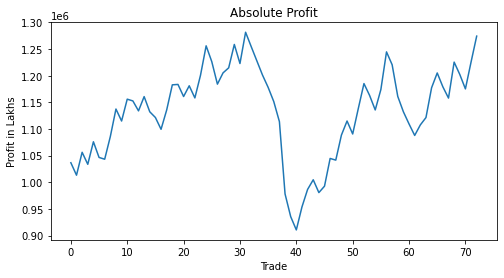

In [154]:
TradeReport['Total_Capital_Returns'].plot(figsize = (8,4))
plt.title("Absolute Profit")
plt.xlabel('Trade')
plt.ylabel('Profit in Lakhs')

Graph of cumulative returns of strategy is plotted vs trades .

Text(0, 0.5, ' %')

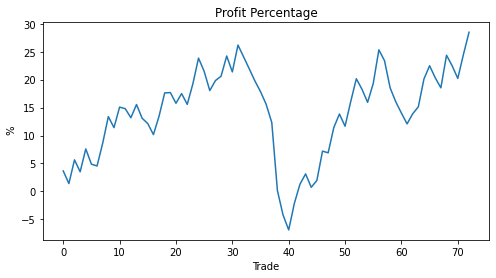

In [155]:
TradeReport['Returns'].cumsum().plot(figsize = (8,4))
plt.title("Profit Percentage")
plt.xlabel('Trade')
plt.ylabel(' %')

Drawdown of startegy in % is plotted to show the risk of the strategy.

Text(0, 0.5, ' % drawdown')

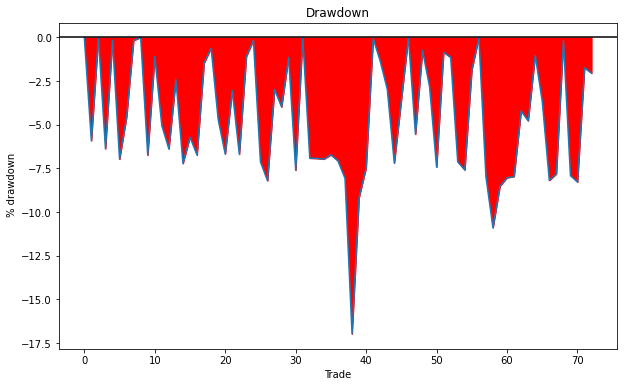

In [156]:
TradeReport['Drawdown'].plot(figsize = (10,6))
plt.axhline(0 , label ='Line3', color ='black')
plt.fill_between(TradeReport.index, TradeReport['Drawdown'], color='red')
plt.title("Drawdown")
plt.xlabel('Trade')
plt.ylabel(' % drawdown')

Sample Performace Of the Entire Strategy is listed and updated 

In [157]:
stats =pd.read_csv('SamplePerformanceStats.csv')
stats['Percentage Return'].iloc[1] = len(TradeReport)
stats['Percentage Return'].iloc[2] = len(TradeReport[TradeReport['Returns'] >= 0])
stats['Percentage Return'].iloc[3] = len(TradeReport[TradeReport['Returns']<= 0])
stats['Percentage Return'].iloc[4] = (stats['Percentage Return'].iloc[2] /stats['Percentage Return'].iloc[1])*100
stats['Percentage Return'].iloc[5] =  TradeReport[TradeReport['Returns'] >= 0]['Returns'].mean()/ (- TradeReport[TradeReport['Returns'] <= 0]['Returns'].mean() )
stats['Percentage Return'].iloc[6] =  TradeReport['Returns'].cumsum()[len(TradeReport)-1] /(- np.min( np.array( TradeReport['Drawdown'] ) ) )   
stats['Percentage Return'].iloc[7] = TradeReport['Returns'].cumsum()[len(TradeReport)-1] / stats['Percentage Return'].iloc[1]
stats['Percentage Return'].iloc[8] = TradeReport[TradeReport['Returns'] >= 0]['Returns'].mean()
stats['Percentage Return'].iloc[9] = TradeReport[TradeReport['Returns'] <= 0]['Returns'].mean()
stats['Percentage Return'].iloc[10] = TradeReport[TradeReport['Returns'] >= 0]['Returns'].max()
stats['Percentage Return'].iloc[11] = TradeReport[TradeReport['Returns'] <= 0]['Returns'].min()
stats['Percentage Return'].iloc[12] =  TradeReport['Returns'].cumsum()[len(TradeReport)-1]/12
stats['Percentage Return'].iloc[13]  =   TradeReport['Returns'].cumsum()[len(TradeReport)-1]
stats['Percentage Return'].iloc[14]  =   TradeReport['Returns'].cumsum()[len(TradeReport)-1]
stats['Percentage Return'].iloc[15]  =   TradeReport['Returns'].cumsum()[len(TradeReport)-1]
stats['Percentage Return'].iloc[16]  =    np.min( np.array( TradeReport['Drawdown'] ) ) 
stats

,Stats,Percentage Return,Absolute Return
0,Capital,1000000,NaN
1,Total Trades,73,NaN
2,Profitable Trades,35,NaN
3,Losing Trades,38,NaN
4,Hit Ratio,47.945205,NaN
5,Risk Reward,1.41922,NaN
6,Calmar ratio,1.677104,NaN
7,Avg Return Per Trade,0.390047,1900.0
8,Avg Profit Per Trade,3.461934,4500.0
9,Avg Loss Per Trade,-2.439322,-2700.0


In [110]:
TradeReport[TradeReport['Returns'] >= 0]['Returns'].mean()

3.4619335306300614

In [7]:
Trade_Report = pd.DataFrame(trade_report, columns =cols)
main =Trade_Report

In [8]:
main

,Date,Expiry,En_Date,Ce_En_Date,Pe_En_Date,Ce_Ex_Date,Pe_Ex_Date,Fut_En_Price,Atm_Strike,Ce_Short_Strike,...,Pe_Short_Ex_Price,Ce_Long_En_Price,Ce_Long_Ex_Price,Pe_Long_En_Price,Pe_Long_Ex_price,Returns_Abs,Quantity,Lot_Size,Total_Abs,Total_Capital_Returns
0,2017-07-14,2017-07-20,2017-07-14,2017-07-14,2017-07-14,2017-07-18,2017-07-18,23822.00,23800,23800,...,22.85,11.85,31.45,15.10,3.70,-73.00,300,25,-21900.00,978100.00
1,2017-07-19,2017-07-20,2017-07-19,2017-07-19,2017-07-19,2017-07-21,2017-07-21,24146.00,24100,24100,...,89.45,1.95,30.00,4.10,15.00,-121.75,350,25,-42612.50,935487.50
2,2017-07-21,2017-07-27,2017-07-21,2017-07-21,2017-07-21,2017-07-26,2017-07-26,24229.50,24200,24200,...,8.30,14.40,33.55,15.25,2.90,-90.75,275,25,-24956.25,910531.25
3,2017-07-26,2017-07-27,2017-07-26,2017-07-26,2017-07-26,2017-07-26,2017-07-26,24551.50,24600,24600,...,152.00,2.20,45.00,6.10,117.00,132.65,325,25,43111.25,953642.50
4,2017-07-27,2017-07-27,2017-07-27,2017-07-27,2017-07-27,2017-07-27,2017-07-27,24883.60,24900,24900,...,8.95,1.35,0.20,0.80,0.10,93.90,350,25,32865.00,986507.50
5,2017-07-28,2017-08-03,2017-07-28,2017-07-28,2017-07-28,2017-08-03,2017-08-03,24941.15,24900,24900,...,0.15,20.65,0.05,26.30,0.10,72.45,250,25,18112.50,1004620.00
6,2017-08-04,2017-08-10,2017-08-04,2017-08-04,2017-08-04,2017-08-09,2017-08-09,24776.00,24800,24800,...,4.65,11.10,1.00,27.35,49.40,-87.45,275,25,-24048.75,980571.25
7,2017-08-10,2017-08-10,2017-08-10,2017-08-10,2017-08-10,2017-08-10,2017-08-10,24324.60,24300,24300,...,0.05,0.35,0.10,1.05,0.05,32.10,375,25,12037.50,992608.75
8,2017-08-11,2017-08-17,2017-08-11,2017-08-11,2017-08-11,2017-08-17,2017-08-17,24165.15,24200,24200,...,5.45,17.05,0.05,78.80,0.05,260.20,200,25,52040.00,1044648.75
9,2017-08-18,2017-08-24,2017-08-18,2017-08-18,2017-08-18,2017-08-24,2017-08-24,24048.00,24000,24000,...,317.55,40.35,0.60,61.15,0.05,-15.70,200,25,-3140.00,1041508.75


In [9]:
main.to_excel('Trade_Report_3_Month.xlsx')

In [ ]:
hl1 = dff[  (dff['Date'] == '2017-08-03') & (dff['Time'] == '10:30:59') &  (dff['Strike'] == 25200) & (dff['Type'] == 'CE') ]
np.shape(hl1)[0]

In [ ]:
hl1['Close'].iloc[0]

In [ ]:
hl1

In [ ]:
dff[dff['Date'] == '2017-01-19']

In [ ]:
dff.iloc[297320]

In [ ]:
dff[  (dff['Date'] == '2017-01-02') & (dff['Time'] == '09:15:59') &  (dff['Strike'] == 18000) ]

In [ ]:
np.shape(h)

In [ ]:
dff[  (dff['Date'] == '2017-01-02') & (dff['Time'] == '09:15:59') &  (dff['Strike'] == 18000)  & (dff['Type'] == 'CE') ]

In [ ]:
df[df['Time'] == '10:30:59']

In [ ]:
18000*0.02

In [ ]:
18600 + 360

In [ ]:
25*round(18960/25)

In [ ]:
dff['Type'].iloc[0]

In [ ]:
df['Time'][0]

In [ ]:
timer = 1
df_5 = [ df.iloc[0: 1] ]
for i in range (1 , len(df)) :
    if timer != 6 :
        timer = timer + 1
    if timer == 6 :
        df_5.append(df.iloc[i:i+1])
        timer = 1
    
df_5_min = pd.DataFrame()
for i in range (len(df_5)) :
    df_5_min = pd.concat(  [df_5_min , df_5[i] ] , axis = 0   )
df = df_5_min   

In [104]:
np.mod(-100)


TypeError: remainder() takes from 2 to 3 positional arguments but 1 were given

In [ ]:
2                         
3
7
1
5
3

In [115]:
21/6

3.5